In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error


In [2]:
# The code below adapted from Michael P. Moran's snippet.
def summarize_data(df):
    
    df_head = df.head()
    print(f'HEAD\n{df_head}', end='\n\n')
   
    df_tail = df.tail()
    print(f'TAIL\n{df_tail}', end='\n\n')

    shape_tuple = df.shape
    print(f'SHAPE: {shape_tuple}', end='\n\n')
    
    df_describe = df.describe()
    print(f'DESCRIPTION\n{df_describe}', end='\n\n')
    
    df.info()
    print(f'INFORMATION')    

    print(f'VALUE COUNTS', end='\n\n')
    for col in df.columns:
        n = df[col].unique().shape[0]
        col_bins = min(n, 10)
        print(f'{col}:')
        if df[col].dtype in ['int64', 'float64'] and n > 10:
            print(df[col].value_counts(bins=col_bins, sort=False, dropna=False))
        else:
            print(df[col].value_counts(dropna=False))
        print('\n')

In [3]:
def model_linreg(X_train, y_train, features):
    # Create linear regression objects
    lm0 = LinearRegression()
    print(lm0)

    lm0.fit(X_train[features], y_train)
    print(lm0)

    lm0_y_intercept = lm0.intercept_
    print(lm0_y_intercept)

    lm0_coefficients = lm0.coef_
    print(lm0_coefficients)

    print()
    print('Univariate - log error = b + m1 * square feet')
    print('    y-intercept  (b): %.2f' % lm0_y_intercept)
    print('    coefficient (m1): %.2f' % lm0_coefficients[0][0])

    y_pred_lm0 = lm0.predict(X_train[features])

    mse_lm0 = mean_squared_error(y_train, y_pred_lm0)
    print("Linear Model\n  mean_squared_error: {:.3}".format(mse_lm0)) 

    r2_lm0 = r2_score(y_train, y_pred_lm0)

    print('  {:.2%} of the variance in the log error can be explained by the number of square feet.'.format(r2_lm0))

    return lm0, r2_lm0

In [5]:
from pydataset import data

df = data('swiss')

In [6]:
data('swiss', show_doc=True)

swiss

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Swiss Fertility and Socioeconomic Indicators (1888) Data

### Description

Standardized fertility measure and socio-economic indicators for each of 47
French-speaking provinces of Switzerland at about 1888.

### Usage

    data(swiss)

### Format

A data frame with 47 observations on 6 variables, each of which is in percent,
i.e., in [0,100].

[,1] Fertility Ig, "common standardized fertility measure" [,2] Agriculture
[,3] Examination nation [,4] Education [,5] Catholic [,6] Infant.Mortality
live births who live less than 1 year.

All variables but 'Fert' give proportions of the population.

### Source

Project "16P5", pages 549-551 in

Mosteller, F. and Tukey, J. W. (1977) “Data Analysis and Regression: A Second
Course in Statistics”. Addison-Wesley, Reading Mass.

indicating their source as "Data used by permission of Franice van de Walle.
Office of Population Research, Princeton Univer

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c198489e8>,
      dtype=object)

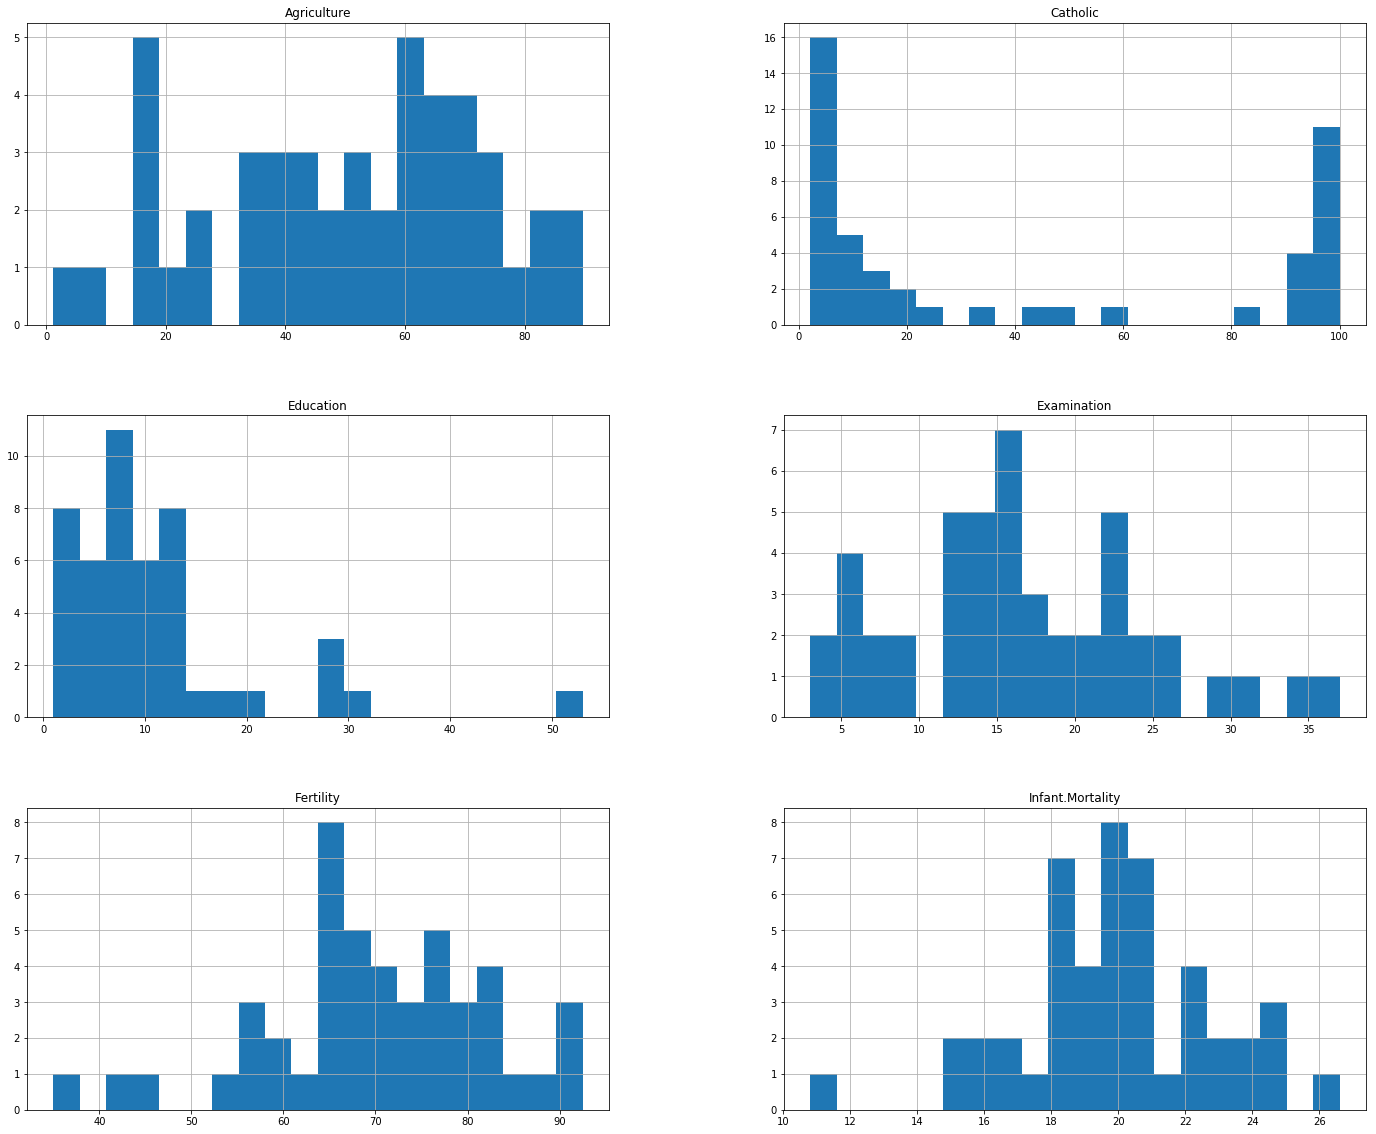

In [7]:
df.hist(figsize=(24, 20), bins=20)

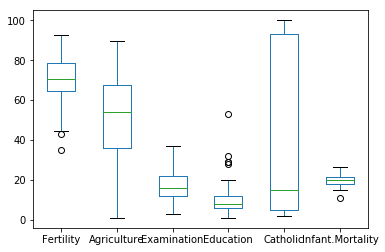

In [8]:
df.plot.box()

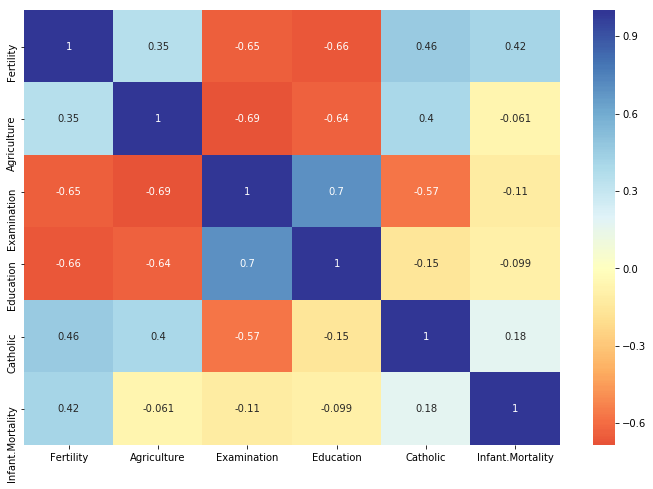

In [9]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap='RdYlBu', annot=True, center=0)

In [10]:
summarize_data(df)

HEAD
              Fertility  Agriculture  Examination  Education  Catholic  \
Courtelary         80.2         17.0           15         12      9.96   
Delemont           83.1         45.1            6          9     84.84   
Franches-Mnt       92.5         39.7            5          5     93.40   
Moutier            85.8         36.5           12          7     33.77   
Neuveville         76.9         43.5           17         15      5.16   

              Infant.Mortality  
Courtelary                22.2  
Delemont                  22.2  
Franches-Mnt              20.2  
Moutier                   20.3  
Neuveville                20.6  

TAIL
              Fertility  Agriculture  Examination  Education  Catholic  \
Val de Ruz         77.6         37.6           15          7      4.97   
ValdeTravers       67.6         18.7           25          7      8.65   
V. De Geneve       35.0          1.2           37         53     42.34   
Rive Droite        44.7         46.6           16 

In [11]:
# Both with the . target variable
train, test = train_test_split(df)

# train_test_split
X = df.drop(['Fertility'], axis=1)

print(X.head())

y = df[['Fertility']]
print(y.head())

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.80, random_state=493)

train = pd.concat([X_train, y_train], axis=1)

print()
print("Train columns:  %s" % list(train.columns))
print("Train dimensions (rows, columns):", train.shape)
print()

test = pd.concat([X_test, y_test], axis=1)

print("Test columns:  %s" % list(test.columns))
print("Test dimensions (rows, columns):", test.shape)
print()

X.sample(10)

              Agriculture  Examination  Education  Catholic  Infant.Mortality
Courtelary           17.0           15         12      9.96              22.2
Delemont             45.1            6          9     84.84              22.2
Franches-Mnt         39.7            5          5     93.40              20.2
Moutier              36.5           12          7     33.77              20.3
Neuveville           43.5           17         15      5.16              20.6
              Fertility
Courtelary         80.2
Delemont           83.1
Franches-Mnt       92.5
Moutier            85.8
Neuveville         76.9

Train columns:  ['Agriculture', 'Examination', 'Education', 'Catholic', 'Infant.Mortality', 'Fertility']
Train dimensions (rows, columns): (37, 6)

Test columns:  ['Agriculture', 'Examination', 'Education', 'Catholic', 'Infant.Mortality', 'Fertility']
Test dimensions (rows, columns): (10, 6)



/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


,Agriculture,Examination,Education,Catholic,Infant.Mortality
Aubonne,67.5,14,7,2.27,19.1
Echallens,72.6,18,2,24.20,21.2
Porrentruy,35.3,9,7,90.57,26.6
Val de Ruz,37.6,15,7,4.97,20.0
Moutier,36.5,12,7,33.77,20.3
Rive Gauche,27.7,22,29,58.33,19.3
Neuveville,43.5,17,15,5.16,20.6
Orbe,54.1,20,6,4.20,15.3
Neuchatel,17.6,35,32,16.92,23.0
Paysd'enhaut,63.5,6,3,2.56,18.0


In [12]:
lm1, r2_lm1 = model_linreg(X_train, y_train, features=['Agriculture',
                                                          'Catholic'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
[56.12730214]
[[0.19278383 0.0892016 ]]

Univariate - log error = b + m1 * square feet
    y-intercept  (b): 56.13
    coefficient (m1): 0.19
Linear Model
  mean_squared_error: 1.15e+02
  28.80% of the variance in the log error can be explained by the number of square feet.


In [13]:
lm2, r2_lm2 = model_linreg(X_train, y_train, features=['Education',
                                                       'Examination'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
[83.9617865]
[[-0.57434436 -0.46365832]]

Univariate - log error = b + m1 * square feet
    y-intercept  (b): 83.96
    coefficient (m1): -0.57
Linear Model
  mean_squared_error: 76.4
  52.89% of the variance in the log error can be explained by the number of square feet.


In [15]:
# Make predictions using the testing set
y_pred_lm2 = lm2.predict(X_test[['Education', 'Examination']])
mse = mean_squared_error(y_test, y_pred_lm2)
r2 = r2_score(y_test, y_pred_lm2)
print(f'Mean Squared Error: {mse}')
print(f'R Squared Error: {r2}')

Mean Squared Error: 73.87545494586526
R Squared Error: 0.35608173291728895


In [16]:
lm3, r2_lm3 = model_linreg(X_train, y_train, features=df.columns.drop('Fertility'))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
[66.0641749]
[[-0.16653479 -0.01785006 -0.99170994  0.11896843  0.94875131]]

Univariate - log error = b + m1 * square feet
    y-intercept  (b): 66.06
    coefficient (m1): -0.17
Linear Model
  mean_squared_error: 47.4
  70.78% of the variance in the log error can be explained by the number of square feet.


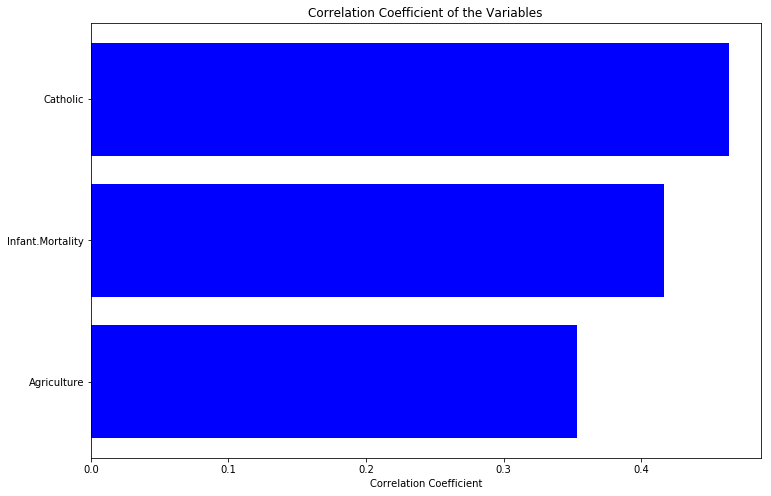

In [17]:
# Correlation coefficient of each of these variables
x_vars = [col for col in df.columns if col not in ['Fertility'] if df[col].dtype=='float64']

labels = []
values = []
for col in x_vars:
    labels.append(col)
    values.append(np.corrcoef(df[col].values, df.Fertility.values)[0,1])
correlation_df = pd.DataFrame({'col_labels':labels, 'corr_values':values})
correlation_df = correlation_df.sort_values(by='corr_values')
    
ind = np.arange(len(labels))
width = 1
fig, ax = plt.subplots(figsize=(12,8))
rects = ax.barh(ind, np.array(correlation_df.corr_values.values), color='b')
ax.set_yticks(ind)
ax.set_yticklabels(correlation_df.col_labels.values)
ax.set_xlabel("Correlation Coefficient")
ax.set_title("Correlation Coefficient of the Variables")
plt.show()

In [18]:
ols_model = sm.OLS(y_train, X_train)
fit = ols_model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Fertility   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     370.0
Date:                Thu, 18 Apr 2019   Prob (F-statistic):           2.56e-27
Time:                        10:00:22   Log-Likelihood:                -134.78
No. Observations:                  37   AIC:                             279.6
Df Residuals:                      32   BIC:                             287.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Agriculture          0.1724      0.091      1.898      0.067      -0.013       0.357
Examination          0.6865      0.383      1.792      0.083      -0.094       1.467
Education           -0.7649      0.306     -2.503      0.018      -1.387      -0.142
Catholic             0.1155      0.055      2.085      0.045       0.003       0.228
Infant.Mortality     2.6657      0.346      7.703      0.000       1.961       3.371
==============================================================================
Omnibus:                        1.946   Durbin-Watson:                   2.112
Prob(Omnibus):                  0.378   Jarque-Bera (JB):                1.804
Skew:                           0.458   Prob(JB):                        0.406
Kurtosis:                       2.424   Cond. No.                         24.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""